In [116]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing as scale
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score as AUC
import threading

In [117]:
#loading csv file into python
dataset = pd.read_csv('./device_failure.csv',encoding='unicode_escape')

In [118]:
dataset.head(100)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [119]:
#dataset.isnull().sum()
#data = dataset.dropna(axis=0)

In [120]:
print (dataset.dtypes)
dataset.head (100)

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [121]:
dataset['date'] = pd.to_datetime(dataset['date'])
le = scale.LabelEncoder()
dataset['device'] = le.fit_transform(dataset['device'])

data = dataset.dropna(axis=0)
#print ("device " , dataset['device'])
data.dtypes

date          datetime64[ns]
device                 int32
failure                int64
attribute1             int64
attribute2             int64
attribute3             int64
attribute4             int64
attribute5             int64
attribute6             int64
attribute7             int64
attribute8             int64
attribute9             int64
dtype: object

In [122]:
data.describe()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,622.379191,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,327.177800,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,378.000000,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,602.000000,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,917.000000,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1168.000000,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [123]:
#the installation date does not have much to offer. Its just a daily datetime value for dynamic data
#adding a day row representing age (in days) from inital date of installation 
#assumption that first reading for a device is the installation date
#data.sort_values(['device','date'],inplace=True)
#data['Days'] = data.groupby('device')['date'].rank(method='dense')
#data['date'] = pd.to_datetime(data['date'])

In [124]:
#initial data analysis
#data.columns.shape
#data['failure'].value_counts()
#data.groupby(['attribute7','attribute8'])['attribute7'].count()
#attributes 7 and 8 have same values so one of them can be discarded

In [125]:
#Failure rate Vs days from installation 
#Failure = data[data.failure==1]

#Failure.Days.value_counts().plot(kind='barh')
#plt.plot(Failure.Days,Failure.failure,'o')
#plt.title("Distribution of Failure Rate as per age(days) from installation")
#plt.ylabel("Failure")
#plt.xlabel("Age(No. of days since installation)")
#highly unlikely that age has any relation with failure rate

In [126]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns))
    drop_cols = []
    
    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i):(i+1)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print("Related columns have been found " , col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
  

    # Drops the correlated columns
    df = x.drop(drop_cols, axis=1)
    return df

data = corr_df (data,0.8)
data
#Corr = data[data.columns].corr()
#sns.heatmap(Corr,annot=True)
#attrute 9 and 3 seem to have a good co-relation though not high enough


Related columns have been found  attribute8 | attribute7 | 1.0


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,2015-01-01,0,0,215630672,56,0,52,6,407438,0,7
1,2015-01-01,2,0,61370680,0,3,0,6,403174,0,0
2,2015-01-01,3,0,173295968,0,0,0,12,237394,0,0
3,2015-01-01,4,0,79694024,0,0,0,6,410186,0,0
4,2015-01-01,5,0,135970480,0,0,0,15,313173,0,3
5,2015-01-01,6,0,68837488,0,0,41,6,413535,0,1
6,2015-01-01,7,0,227721632,0,0,0,8,402525,0,0
7,2015-01-01,8,0,141503600,0,0,1,19,494462,16,3
8,2015-01-01,9,0,8217840,0,1,0,14,311869,0,0
9,2015-01-01,10,0,116440096,0,323,9,9,407905,0,164


2015-01-19    8
2015-05-08    3
2015-02-04    3
2015-07-09    2
2015-01-29    2
2015-03-19    2
2015-05-21    2
2015-05-07    2
2015-02-09    2
2015-05-13    2
Name: date, dtype: int64


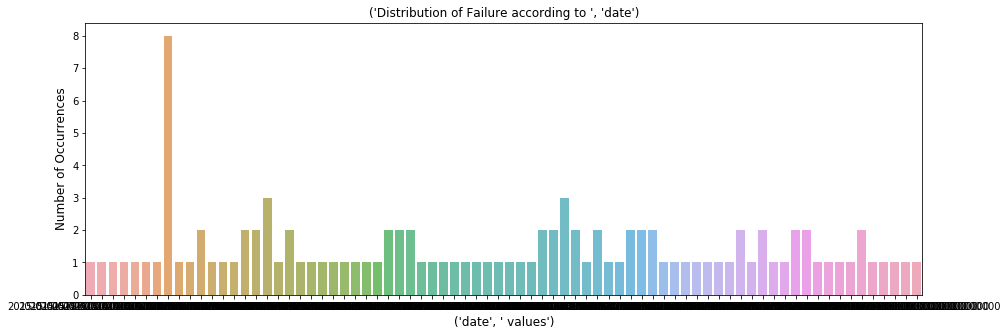

254     1
829     1
838     1
842     1
401     1
78      1
1105    1
514     1
852     1
886     1
Name: device, dtype: int64


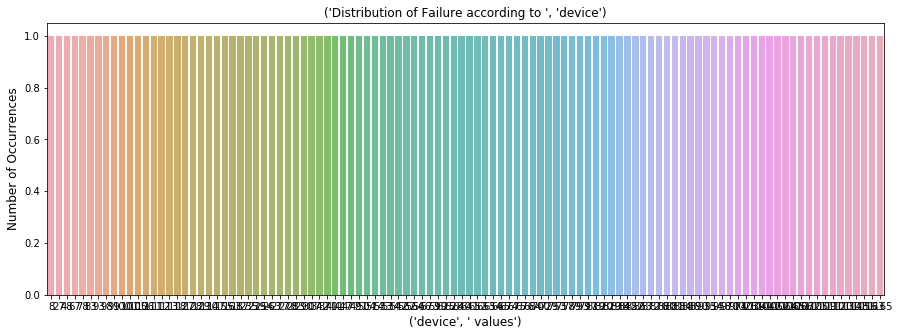

46099450     1
212770360    1
77877592     1
21389544     1
149049520    1
39737416     1
68239312     1
136429411    1
89738992     1
9995856      1
Name: attribute1, dtype: int64


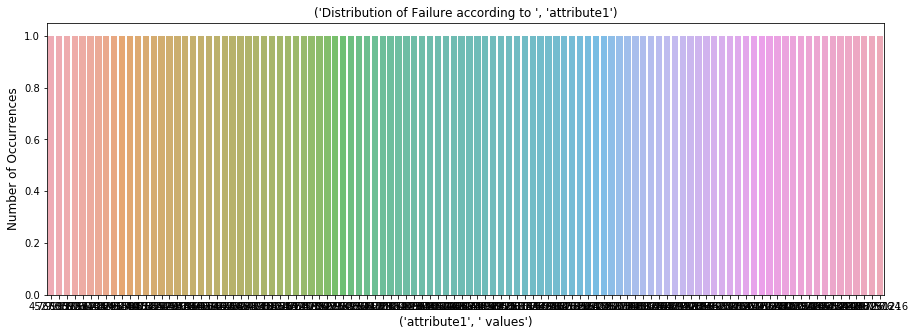

0        58
88        2
10336     1
1080      1
10288     1
1184      1
64784     1
304       1
440       1
21200     1
Name: attribute2, dtype: int64


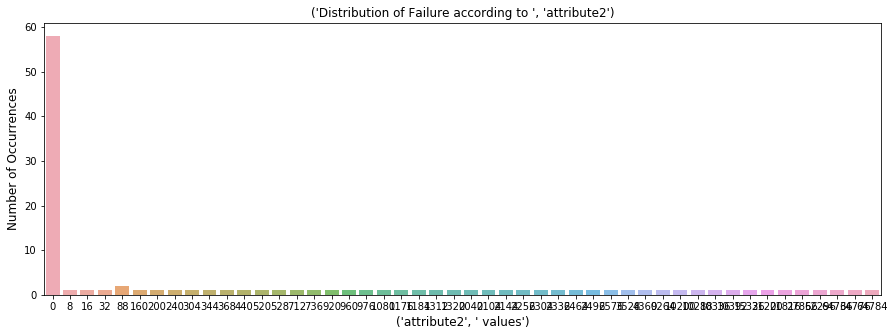

0      95
1       5
2       2
70      1
318     1
9       1
8       1
Name: attribute3, dtype: int64


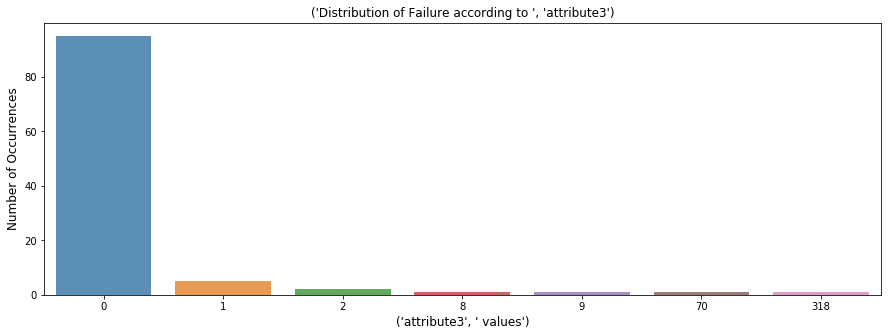

0     44
1      9
9      4
12     4
2      3
18     3
7      3
16     2
11     2
60     2
Name: attribute4, dtype: int64


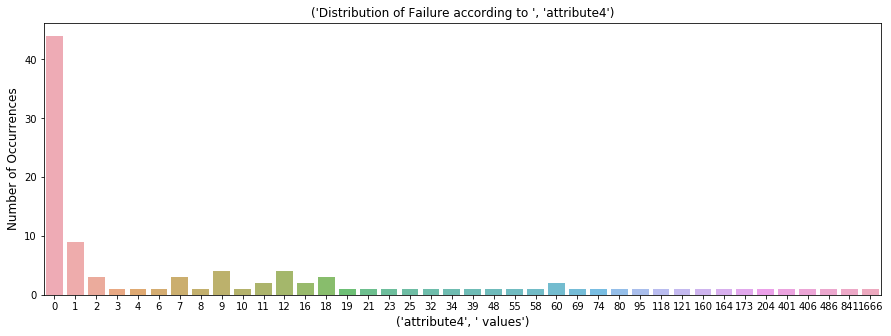

8     21
7     10
9     10
12    10
6      7
10     7
16     6
14     5
36     4
11     4
Name: attribute5, dtype: int64


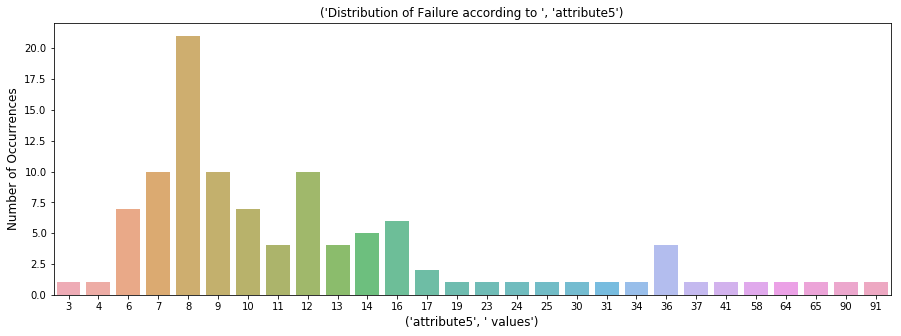

45        2
276221    1
198466    1
336709    1
285511    1
342856    1
236109    1
262734    1
49        1
268094    1
Name: attribute6, dtype: int64


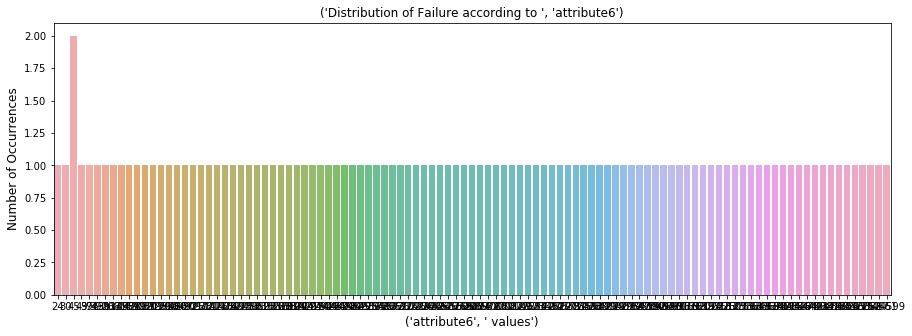

0      67
8      11
16      8
48      3
32      3
24      3
56      2
744     1
216     1
80      1
Name: attribute7, dtype: int64


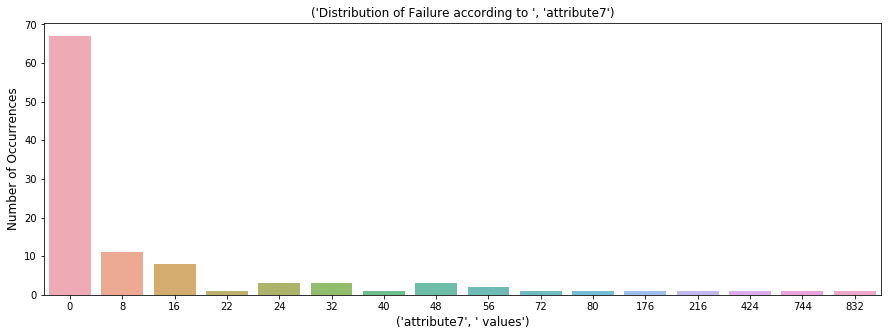

0       76
1        7
2        6
3        4
5        3
7        2
1080     1
52       1
41       1
19       1
Name: attribute9, dtype: int64


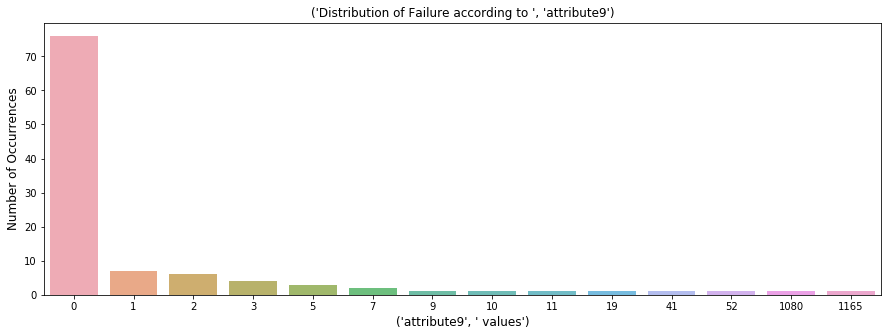

In [127]:
Failure = data[data.failure==1]
dataWithNoFailure = data.drop(['failure'], axis=1)
iters = range(len(dataWithNoFailure.columns))
for i in iters:  
    values_count  = Failure[dataWithNoFailure.columns[i]].value_counts(sort=True)
    print(values_count.head(10))
    plt.figure(figsize=(15,5))
    sns.barplot(values_count.index, values_count.values, alpha=0.8)
    title = "Distribution of Failure according to ", dataWithNoFailure.columns[i]
    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    xlabel = dataWithNoFailure.columns[i] , " values"
    plt.xlabel(xlabel, fontsize=12)
    plt.show()







In [128]:
data.describe()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
count,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,622.379191,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,12.451524
std,327.177800,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,191.425623
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000
25%,378.000000,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000
50%,602.000000,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000
75%,917.000000,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000
max,1168.000000,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,18701.000000


In [129]:
def datasetIsBalanced (data):
    for i in data['failure'].value_counts(normalize=True).tolist():
        if (i < 0.7):
            return False
        
if not datasetIsBalanced (data):
    print ("Not balanced")

#since data is highly imbalanced we would be downsampling data.
#resampling data

    df_nonfailure = data[data['failure'] == 0]
    df_failure = data[data['failure']==1]
    df_nonfailure_downsample = resample(df_nonfailure,replace=False,n_samples = 106,\
                                        random_state=23)
    df_resampled = pd.concat([df_nonfailure_downsample,df_failure])

    data_Outcome = df_resampled['failure']
    #scaling cat and cont data
    

    #dropping unwanted columns
    #That needs to be validated with customer as they might want to keep some of them
    df_resampled = df_resampled.drop(['failure','date','device','attribute1'],axis = 1)
    standard_sc = scale.StandardScaler()
    x_std = standard_sc.fit_transform(df_resampled)
    data_scaled = pd.DataFrame(x_std)


    data_scaled.head()

    #split data into test and train
    xtrain,xtest,ytrain,ytest = train_test_split(data_scaled,data_Outcome,test_size=0.25,random_state =19)
else:
    #dropping unwanted columns
    #df_resampled = df_resampled.drop(['failure','date','device','attribute8'],axis = 1)
    data = data.drop(['failure','date','device','attribute1'],axis = 1)
    standard_sc = scale.StandardScaler()
    x_std = standard_sc.fit_transform(data)
    data = pd.DataFrame(x_std)
    #split data into test and train
    xtrain,xtest,ytrain,ytest = train_test_split(data,data['failure'],test_size=0.25,random_state =19)

Not balanced


c:\users\lbazoga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lbazoga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [130]:
#defining a metrics function to evaluate a model
def Metrics(ytest,pred):
    print('accuray:', accuracy_score(ytest,pred),',recall score:',recall_score(ytest,pred),'\n ConfusionMatrix: \n',confusion_matrix(ytest,pred))
    #model_rf.feature_importances_
    average_precision = average_precision_score(ytest,pred)
    print('average_precision_score: ',average_precision_score(ytest,pred))
    print('Precision Score:',precision_score(ytest,pred_rf),'F1_score:',f1_score(ytest,pred_rf))
    
    precision, recall,_ = precision_recall_curve(ytest,pred)
    plt.step(recall,precision, color='b',alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,\
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(\
              average_precision))
    #plt.title(algo)

In [164]:
def runModel (model, xtrain, ytrain):
    #decision tree classifier
    model = str(model)
    if  (model == "DecisionTreeClassifier"):
        model_init = DecisionTreeClassifier(random_state=12)
    elif (model == "RandomForestClassifier"):
        model_init = RandomForestClassifier(n_estimators=25, min_samples_split=25, \
                            max_depth=5,random_state=72)
    elif (model == "GaussianNB"):
        model_init = GaussianNB()
    elif (model == "SVC"):
        model_init = SVC(kernel='linear')
    else:
        return
    
    model_dt = model_init.fit(xtrain,ytrain)
    pred_dt=model_dt.predict(xtest)
    #Metrics(ytest,pred_dt)
    print(model , 'accuray:', accuracy_score(ytest,pred_dt),',recall score:',recall_score(ytest,pred_dt))
    print(model, "\n", confusion_matrix(ytest,pred_dt))
    #print(model_dt.feature_importances_ )


In [166]:
models = ["DecisionTreeClassifier","RandomForestClassifier","GaussianNB","SVC"]
threads = list()
for model in models:
    t = threading.Thread(target=runModel, args=(model,xtrain,ytrain))
    threads.append(t)
    t.start()

Hola  DecisionTreeClassifier
Hola  RandomForestClassifier
Hola  GaussianNB
Hola  SVC
DecisionTreeClassifier accuray: 0.8490566037735849 ,recall score: 0.7586206896551724
SVC accuray: 0.6792452830188679 ,recall score: 0.41379310344827586
DecisionTreeClassifier 
 [[23  1]
 [ 7 22]]
SVC 
 [[24  0]
 [17 12]]
GaussianNB accuray: 0.7735849056603774 ,recall score: 0.5862068965517241
GaussianNB 
 [[24  0]
 [12 17]]
RandomForestClassifier accuray: 0.8113207547169812 ,recall score: 0.7241379310344828
RandomForestClassifier 
 [[22  2]
 [ 8 21]]


In [28]:
roc_auc_score(ytest,pred_dt)

0.81681034482758619

In [109]:
#random forest 
#rf = RandomForestClassifier(max_depth = 2,random_state=1)
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, \
                            max_depth=5,random_state=72)
model_rf = rf.fit(xtrain,ytrain)
pred_rf = model_rf.predict(xtest)
#Metrics(ytest,pred_rf)
print('******random forest*****')
print('accuray:', accuracy_score(ytest,pred_rf),',recall score:',recall_score(ytest,pred_rf))
print(confusion_matrix(ytest,pred_rf))
print(model_rf.feature_importances_)
#print('Precision Score:',precision_score(ytest,pred_rf),'F1_score:',f1_score(ytest,pred_rf))

******random forest*****
accuray: 0.8113207547169812 ,recall score: 0.7241379310344828
[[22  2]
 [ 8 21]]
[0.31374562 0.02099307 0.26075405 0.06595401 0.11725724 0.20180843
 0.01948759]


NameError: name 'precision_score' is not defined

In [110]:
#gaussian naive bayes
gnb = GaussianNB()
modelgnb = gnb.fit(xtrain,ytrain)
pred_gnb = modelgnb.predict(xtest)
#Metrics(ytest,pred_gnb)


In [112]:
#svm
modelsvc = SVC(kernel='linear')
modelsvc.fit(xtrain,ytrain)
pred_svm = modelsvc.predict(xtest)
#Metrics(ytest,pred_svm)

In [42]:
def model_comparison(X_train,X_test, y_train,y_test):
    lr = LogisticRegression()
    gnb = GaussianNB()
    svc = LinearSVC(C=1.0)
    rfc = RandomForestClassifier(n_estimators=100)
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),\
                      (gnb, 'Naive Bayes'),\
                      (svc, 'Support Vector Classification'),\
                      (rfc, 'Random Forest')]:
        clf.fit(X_train, y_train)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)
    
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s" % (name, ))
    
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
    
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    
    plt.tight_layout()
    plt.show()

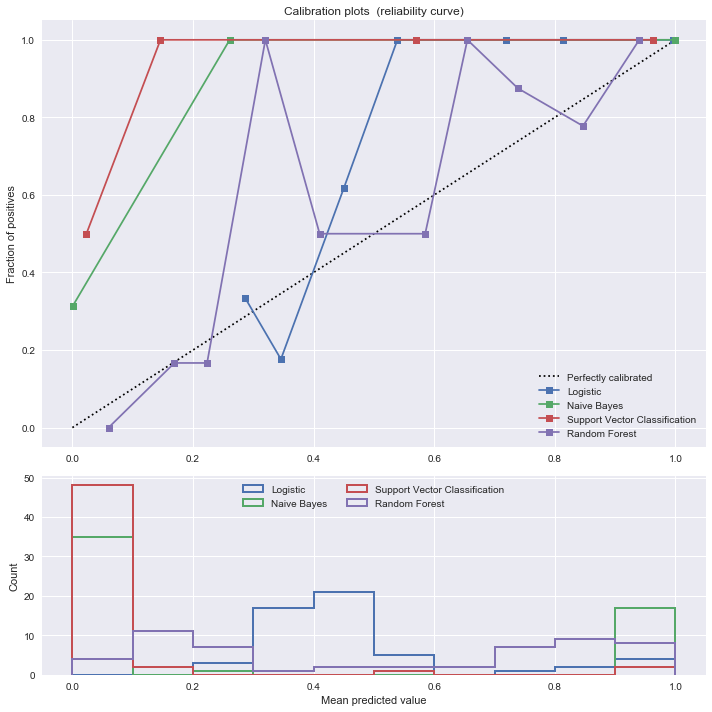

In [43]:
model_comparison(xtrain,xtest,ytrain,ytest)

In [ ]:
#Decision tree and random forest are perhabs giving the best results among all. 
#Although I think models can be improved if provided with more failure data